In [2]:
import numpy as np
import pandas as pd
import random as r

In [3]:
#create our dataset
data=[]

for _ in range(500):
    team_name=f"Team {chr(r.randint(65,90))}"
    season=r.randint(2010,2023)
    wins=r.randint(50,110)
    losses=162-wins
    hits=r.randint(1200,1600)
    doubles=r.randint(200,350)
    triples=r.randint(10,40)
    home_runs=r.randint(100,250)
    strikeouts=r.randint(1000,1500)

    hits_adjusted=hits+(wins-80)*5
    doubles_adjusted=doubles+(wins-80)*2
    triples_adjusted=triples+(wins-80)
    home_runs_adjusted=home_runs+(wins-80)*3
    strikeouts_adjusted=strikeouts-(wins-80)*10

    data.append([team_name,season,wins,losses,hits_adjusted,doubles_adjusted,triples_adjusted,home_runs_adjusted,strikeouts_adjusted])

In [4]:
columns=["Team","Season","Wins","Losses","Hits","Doubles","Triples","HomeRuns","StrikeOuts"]

df=pd.DataFrame(data=data,columns=columns)
df.sample(5)

,Team,Season,Wins,Losses,Hits,Doubles,Triples,HomeRuns,StrikeOuts
409,Team K,2020,77,85,1386,244,32,192,1384
216,Team W,2020,86,76,1478,247,40,148,1036
40,Team A,2016,107,55,1537,261,44,275,875
361,Team C,2020,52,110,1396,197,-18,166,1462
388,Team A,2023,94,68,1389,232,39,236,1198


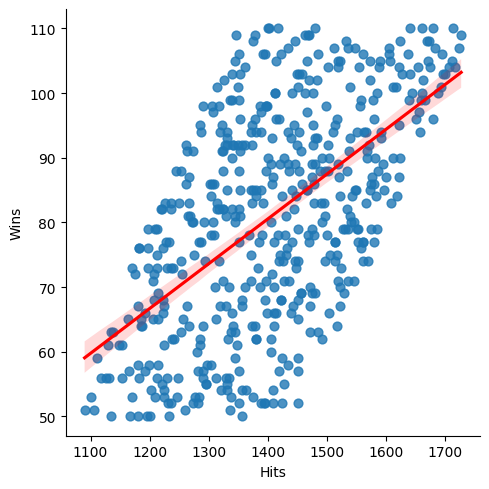

In [39]:
import seaborn as sbn
import matplotlib.pyplot as plt

sbn.lmplot(x="Hits",y="Wins",data=df,markers="o",line_kws={"color":"red"},scatter_kws={"s":40})

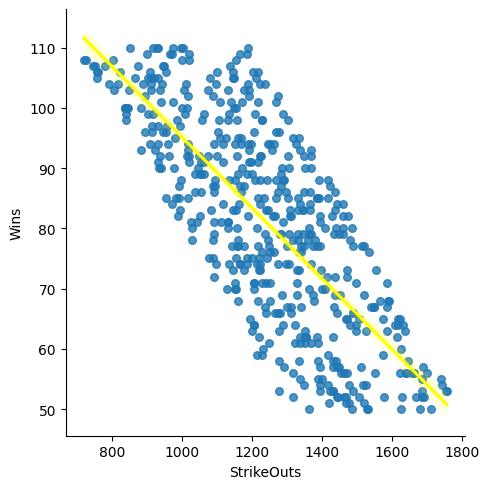

In [43]:
sbn.lmplot(x="StrikeOuts",y="Wins",data=df,markers="o",line_kws={"color":"yellow"},scatter_kws={"s":30})

In [44]:
#Team season and losses columns doesn't affect wins
df.drop(columns=["Team","Losses","Season"],inplace=True)
df

,Wins,Hits,Doubles,Triples,HomeRuns,StrikeOuts
0,90,1613,327,26,147,1170
1,98,1291,373,36,231,1106
2,54,1225,287,1,68,1517
3,58,1434,285,14,131,1333
4,89,1435,238,30,272,1051
...,...,...,...,...,...,...
495,107,1512,303,57,230,945
496,100,1688,321,45,275,847
497,82,1351,297,38,240,1307
498,70,1334,287,1,138,1155


In [8]:
#split our daat as x and y
df2.columns

Index(['Wins', 'Hits', 'Doubles', 'Triples', 'HomeRuns', 'StrikeOuts'], dtype='object')

In [45]:
#x
x=df[['Hits', 'Doubles', 'Triples', 'HomeRuns']]
x

,Hits,Doubles,Triples,HomeRuns
0,1613,327,26,147
1,1291,373,36,231
2,1225,287,1,68
3,1434,285,14,131
4,1435,238,30,272
...,...,...,...,...
495,1512,303,57,230
496,1688,321,45,275
497,1351,297,38,240
498,1334,287,1,138


In [46]:
#y
y=df[['Wins']]
y

,Wins
0,90
1,98
2,54
3,58
4,89
...,...
495,107
496,100
497,82
498,70


In [47]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=24)

In [48]:
x_train

,Hits,Doubles,Triples,HomeRuns
211,1372,270,1,163
84,1471,270,63,305
398,1285,230,8,44
118,1288,273,28,188
126,1338,300,18,131
...,...,...,...,...
401,1167,146,-5,85
343,1326,323,34,260
192,1443,299,21,94
387,1198,336,4,139


In [49]:
y_train

,Wins
211,71
84,109
398,61
118,77
126,63
...,...
401,50
343,102
192,67
387,73


In [50]:
x_test

,Hits,Doubles,Triples,HomeRuns
421,1290,175,-12,163
105,1538,353,21,224
222,1517,208,1,187
119,1340,285,58,287
347,1499,282,40,238
...,...,...,...,...
266,1432,202,28,201
413,1294,307,5,164
100,1362,291,25,121
82,1230,213,3,92


In [51]:
y_test

,Wins
421,57
105,91
222,64
119,99
347,98
...,...
266,75
413,74
100,70
82,73


In [54]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()

linear_reg.fit(x_train,y_train)

y_predicted=linear_reg.predict(x_test)
y_predicted

array([[ 55.82759293],
       [ 85.81756271],
       [ 67.82934417],
       [104.2025213 ],
       [ 93.46671106],
       [ 90.42600192],
       [ 54.43566845],
       [ 94.70624821],
       [ 97.21988342],
       [ 72.35207106],
       [ 64.02460948],
       [ 85.77468628],
       [ 70.63490157],
       [ 99.60982189],
       [ 69.26923946],
       [ 82.50162203],
       [ 87.61054563],
       [ 64.80365582],
       [ 68.4119583 ],
       [ 84.37575312],
       [ 89.52450229],
       [ 52.58242525],
       [ 80.16345559],
       [ 98.7064591 ],
       [100.73778819],
       [ 70.52003992],
       [ 83.06403424],
       [ 90.47418756],
       [ 70.95705529],
       [113.3976464 ],
       [ 59.7133925 ],
       [108.14314139],
       [ 77.85830113],
       [ 81.56231873],
       [ 48.80694095],
       [ 94.14187844],
       [ 83.98597156],
       [ 80.3362774 ],
       [ 92.24640844],
       [ 54.63059124],
       [ 63.2746806 ],
       [ 69.77305786],
       [ 97.26281627],
       [ 85

In [55]:
#it returns R²,The closer the R² value is to 1, the better the model is. Negative value is the worst value

linear_reg.score(x_test,y_test)

0.8264070978258045

In [56]:
linear_reg.score(x_train,y_train)

0.8590604776474737

In [19]:
#Overfitting: If the model scores very high on the training data but low on the test data, it means the model fits the training data too well but fails to generalize to new data. In this case, the model may have learned the noise in the training data.

#Underfitting: If the model scores low on both the training and test data, it means the model has not learned the relationships in the data well enough. You can improve performance by increasing the model's complexity or adding more features.

In [57]:
#check out error rate

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mean_absolute_err=mean_absolute_error(y_test,y_predicted)
mean_squared_err=mean_squared_error(y_test,y_predicted)
r2_score_err=r2_score(y_test,y_predicted)

In [58]:
#the more, less mean absolute error result, the better result 
mean_absolute_err

6.0412252017629

In [59]:
mean_squared_err

51.75943183251033

In [60]:
r2_score_err

0.8264070978258045

In [62]:
#right in the same order with columns of x
#coefficients seems their effects of over dependent variable y  
linear_reg.coef_

array([[0.01153291, 0.03506504, 0.50712528, 0.06808354]])

In [64]:
#so triples are the most effective independent variable
x.columns

Index(['Hits', 'Doubles', 'Triples', 'HomeRuns'], dtype='object')

In [66]:
#constant variable
#when all independent variables(x columns) are 0, y will be the result below
linear_reg.intercept_

array([29.80163934])

In [69]:
#Backward elimination
#check out p values(max values are not proper for model)
import statsmodels.api as sm
#add b0 values in equation
#equation=====>   Y=B0+B1X1+B2X2+B3X3+ERROR_RATE 

X=np.append(arr=np.ones((500,1)).astype(int),values=df,axis=1)
X


array([[   1,   90, 1613, ...,   26,  147, 1170],
       [   1,   98, 1291, ...,   36,  231, 1106],
       [   1,   54, 1225, ...,    1,   68, 1517],
       ...,
       [   1,   82, 1351, ...,   38,  240, 1307],
       [   1,   70, 1334, ...,    1,  138, 1155],
       [   1,   57, 1452, ...,   -9,  175, 1431]], dtype=int64)

In [70]:
df

,Wins,Hits,Doubles,Triples,HomeRuns,StrikeOuts
0,90,1613,327,26,147,1170
1,98,1291,373,36,231,1106
2,54,1225,287,1,68,1517
3,58,1434,285,14,131,1333
4,89,1435,238,30,272,1051
...,...,...,...,...,...,...
495,107,1512,303,57,230,945
496,100,1688,321,45,275,847
497,82,1351,297,38,240,1307
498,70,1334,287,1,138,1155


In [72]:
#create a list consisting of each column except y in df2.
X_list=df.iloc[:,[1,2,3,4,5]].values
X_list

array([[1613,  327,   26,  147, 1170],
       [1291,  373,   36,  231, 1106],
       [1225,  287,    1,   68, 1517],
       ...,
       [1351,  297,   38,  240, 1307],
       [1334,  287,    1,  138, 1155],
       [1452,  226,   -9,  175, 1431]], dtype=int64)

In [73]:
y=df.iloc[:,0:1]

In [74]:
X_list=np.array(X_list,dtype=float)
model=sm.OLS(y,X_list).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   Wins   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          1.418e+04
Date:                Wed, 07 Aug 2024   Prob (F-statistic):                        0.00
Time:                        00:09:26   Log-Likelihood:                         -1674.1
No. Observations:                 500   AIC:                                      3358.
Df Residuals:                     495   BIC:                                      3379.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0323      0.002     16.719      0.000       0.029       0.036
x2             0.0578      0.006      9.413      0.000       0.046       0.070
x3             0.4085      0.026     16.001      0.000       0.358       0.459
x4             0.0620      0.007      9.132      0.000       0.049       0.075
x5            -0.0020      0.001     -1.374      0.170      -0.005       0.001
==============================================================================
Omnibus:                        0.509   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.611
Skew:                           0.062   Prob(JB):                        0.737
Kurtosis:                       2.881   Cond. No.                         159.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#the content of X_list is as follows
#all p values are normal
df.iloc[:,[1,2,3,4,5]]

,Hits,Doubles,Triples,HomeRuns,StrikeOuts
0,1613,327,26,147,1170
1,1291,373,36,231,1106
2,1225,287,1,68,1517
3,1434,285,14,131,1333
4,1435,238,30,272,1051
...,...,...,...,...,...
495,1512,303,57,230,945
496,1688,321,45,275,847
497,1351,297,38,240,1307
498,1334,287,1,138,1155
